In [42]:
import pandas as pd
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import spacy
nlp=spacy.load('en_core_web_sm')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ndarh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ndarh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ndarh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ndarh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [43]:
# Load the data
data = pd.read_csv('Train.csv')

In [44]:
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [45]:
def contains_chinese(text):
    return bool(re.search(r'[\u4e00-\u9fff]', text))

chinese_rows = data[data['Review'].apply(contains_chinese)].index
data.loc[chinese_rows,'Review']='I recently replaced my PC, but the installation and activation of plugins went smoothly.'


In [46]:


import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize

# Sample keyword-based classification
positive_words = {"good","quick", "done","thank","happy", "excellent", "best", "nice", "amazing", "great", "quickly", "love", "fantastic", "wonderful"}
negative_words = {"bad", "terrible", "disappointed", "angry", "sad", "horrible", "awful", "hate", "worst", "poor"}
neutral_words = {"okay", "fine", "average", "decent"}

# Function to classify review sentiment
def classify_review(text):
    words = word_tokenize(text)

    # Check if all words are uppercase (excluding punctuation)
    words_only = [word for word in words if word.isalpha()]  # Remove punctuation
    if words_only and all(word.isupper() for word in words_only):
        return "negative"

    # Convert to lowercase and remove punctuation
    words = word_tokenize(text.lower())

    # Count occurrences of positive, negative, and neutral words
    pos_count = sum(1 for word in words if word in positive_words)
    neg_count = sum(1 for word in words if word in negative_words)
    neu_count = sum(1 for word in words if word in neutral_words)

    # Handle negation (e.g., "not good" should be negative)
    for i in range(len(words) - 1):
        if words[i] == "not" and words[i + 1] in positive_words:
            pos_count -= 1
            neg_count += 1  # Convert to negative sentiment

    # Determine the final classification
    if neg_count > pos_count and neg_count > neu_count:
        return "negative"
    elif pos_count > neg_count and pos_count > neu_count:
        return "positive"
    elif neu_count > 0:
        return "neutral"
    else:
        return "positive"  # Default classification

# Apply to the dataset
data["rule_based_sentiment"] = data["Review"].apply(classify_review)


In [47]:
from wordcloud import WordCloud

def plot_word_cloud(word_set, title, color, filename):
    wordcloud = WordCloud(width=800, height=400, background_color=color, colormap='viridis').generate(" ".join(word_set))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()

# Save word clouds as image files
plot_word_cloud(positive_words, "Positive Words", "white", "positive_words.png")
plot_word_cloud(negative_words, "Negative Words", "black", "negative_words.png")
plot_word_cloud(neutral_words, "Neutral Words", "gray", "neutral_words.png")



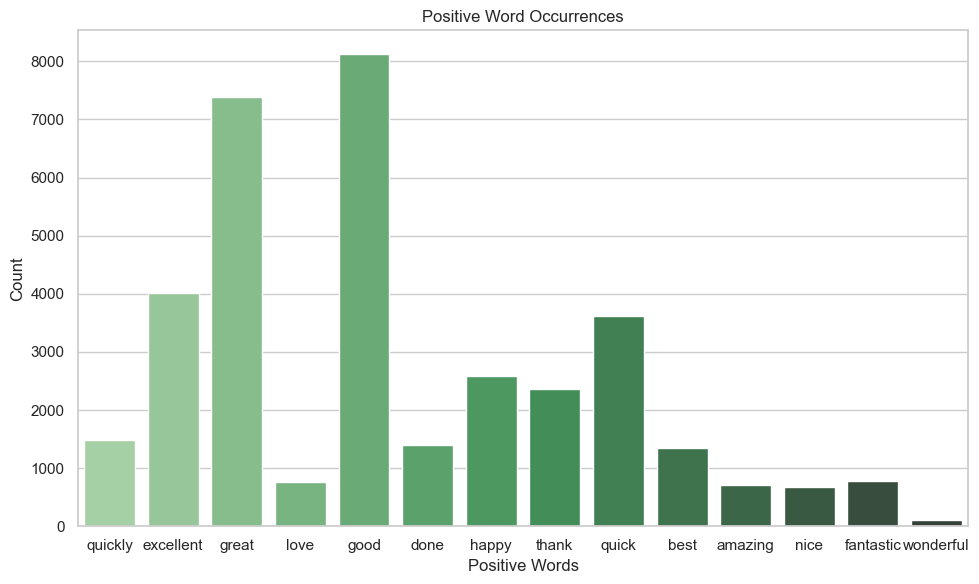

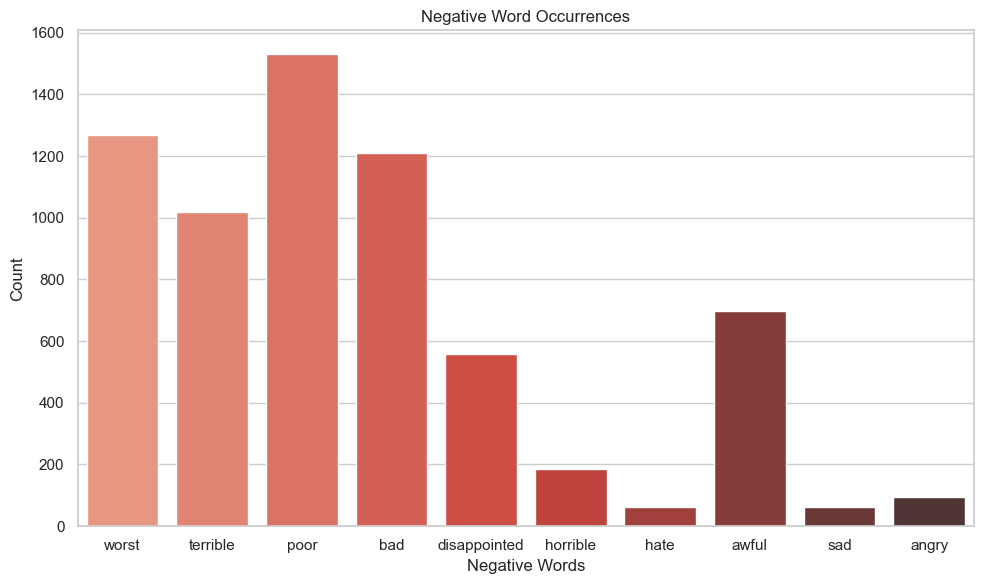

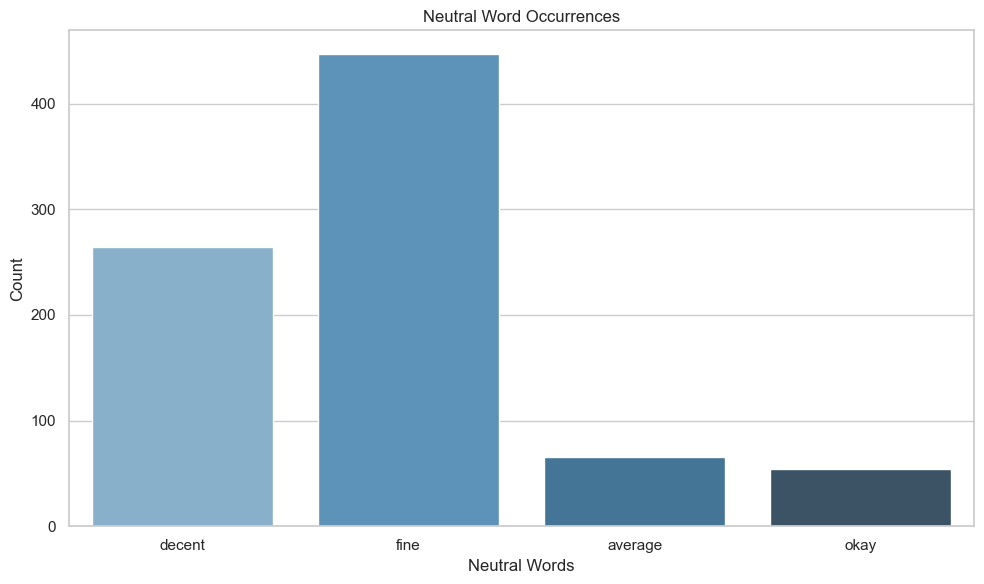

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

# Define the words
positive_words = {"good", "quick", "done", "thank", "happy", "excellent", "best", "nice", "amazing", "great", "quickly", "love", "fantastic", "wonderful"}
negative_words = {"bad", "terrible", "disappointed", "angry", "sad", "horrible", "awful", "hate", "worst", "poor"}
neutral_words = {"okay", "fine", "average", "decent"}



# Function to count occurrences of words in a list of reviews
def count_word_occurrences(reviews, word_list):
    words_count = Counter()
    for review in reviews:
        words = review.lower().split()
        for word in words:
            if word in word_list:
                words_count[word] += 1
    return words_count

# Count occurrences for each set of words
positive_count = count_word_occurrences(data["Review"], positive_words)
negative_count = count_word_occurrences(data["Review"], negative_words)
neutral_count = count_word_occurrences(data["Review"], neutral_words)

# Set the Seaborn style
sns.set(style="whitegrid")

# Plotting Positive Words using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=list(positive_count.keys()), y=list(positive_count.values()), palette="Greens_d")
plt.title('Positive Word Occurrences')
plt.xlabel('Positive Words')
plt.ylabel('Count')
plt.xticks()
plt.tight_layout()
plt.savefig("positive_word_occurrences.png")  # Save the plot
plt.show()

# Plotting Negative Words using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=list(negative_count.keys()), y=list(negative_count.values()), palette="Reds_d")
plt.title('Negative Word Occurrences')
plt.xlabel('Negative Words')
plt.ylabel('Count')
plt.xticks()
plt.tight_layout()
plt.savefig("negative_word_occurrences.png")  # Save the plot
plt.show()

# Plotting Neutral Words using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=list(neutral_count.keys()), y=list(neutral_count.values()), palette="Blues_d")
plt.title('Neutral Word Occurrences')
plt.xlabel('Neutral Words')
plt.ylabel('Count')
plt.xticks()
plt.tight_layout()
plt.savefig("neutral_word_occurrences.png")  # Save the plot
plt.show()



In [49]:
data['merage_data']=data['Review']+" "+data['rule_based_sentiment']

In [50]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


def preprocessing(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^A-Za-z0-9 !?]', '', text)  # Keep numbers
    words = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    processed_text = ' '.join([lemmatizer.lemmatize(word) for word in words if word not in stop_words])
    return processed_text



data['pre_text']=data['merage_data'].apply(preprocessing)


In [51]:
tf_dif=TfidfVectorizer(ngram_range=(1,2))
vector=tf_dif.fit_transform(data['pre_text'])

In [95]:


kmeans = KMeans(
    n_clusters=3,  # Keep 3 clusters
    init='k-means++',  # Smarter initialization
    max_iter=600,  # More iterations for stability
    n_init=15,  # Run multiple times to get the best clustering
    random_state=42
)

In [96]:
vector.shape

(48000, 641451)

In [97]:
cluster = kmeans.fit(vector)


In [98]:
data_test=pd.read_csv('Test.csv')

In [99]:
chinese_rows = data_test[data_test['Review'].apply(contains_chinese)].index
data_test.loc[chinese_rows,'Review']='I recently replaced my PC, but the installation and activation of plugins went smoothly.'
data_test["rule_based_sentiment"] = data_test["Review"].apply(classify_review)

In [100]:

data_test['merage_data']=data_test['Review']+" "+data_test['rule_based_sentiment']

data_test['pre_text']=data_test['merage_data'].apply(preprocessing)

In [101]:
test_v=tf_dif.transform(data_test['pre_text'])

In [102]:
y=kmeans.predict(test_v)

In [103]:
new_data=pd.DataFrame({'Rating':y},index=data_test['ID'])
new_data['Rating']=new_data['Rating'].map({0:1,1:2,2:3})

In [104]:
import numpy as np
from sklearn.metrics import f1_score
from collections import Counter

# Get predicted labels
labels = kmeans.predict(vector)

# Create a mapping dictionary for clusters to actual ratings
mapping = {}
for cluster in np.unique(labels):
    # Find the most common actual rating for each cluster
    true_labels_in_cluster = data["Rating"][labels == cluster]
    most_common_label = Counter(true_labels_in_cluster).most_common(1)[0][0]
    mapping[cluster] = most_common_label

# Map predicted labels to the actual ratings
mapped_labels = np.array([mapping[label] for label in labels])

# Compute micro F1-score
macro_f1 = f1_score(data["Rating"], mapped_labels, average='macro')

print("Macro F1-Score:", macro_f1)


# Macro F1-Score: 0.5970393773999638 with old words basic
# change kmean max_iter=1000,n_init=20 Macro F1-Score: 0.5970393773999638
# add ngram_range=(1,4) Macro F1-Score: 0.5993703540979926
# consider capital words as negative :Macro F1-Score: 0.5970299933563158
# with new words Macro F1-Score: 0.5982111402218296
# new code Macro F1-Score: 0.59902771211487
# Macro F1-Score: 0.5990958312897241 without remove puctuaion
# Macro F1-Score: 0.5989929384437344


Macro F1-Score: 0.5989929384437344


In [105]:
# new_data.to_csv('Test_Predictions.csv')

In [106]:
new_data['Rating'].value_counts()

Rating
3    6384
1    4369
2    1247
Name: count, dtype: int64

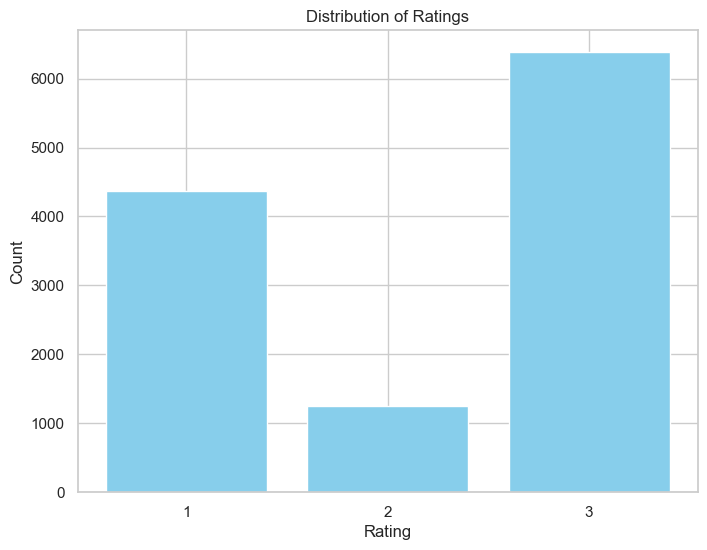

In [107]:
import matplotlib.pyplot as plt

# Calculate the frequency of each rating
rating_counts = new_data['Rating'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rating_counts.index)  # Ensure all rating values are shown
plt.show()



In [108]:
g=pd.read_csv("Test_Predictions_cls.csv")
# Compute micro F1-score
macro_f1 = f1_score(new_data["Rating"], g["Rating"], average='macro')

print("Macro F1-Score:", macro_f1)


# Macro F1-Score: 0.5866027421972094 with old words basic
# Macro F1-Score: 0.5866027421972094 change kmean max_iter=1000,n_init=20
#consider capital words as negative : Macro F1-Score: 0.5868761220362944
# # with new words Macro F1-Score: 0.5870143739974212
# new code Macro F1-Score: 0.5872181853637212
# Macro F1-Score: 0.5874059187500148 without remove punctuation




Macro F1-Score: 0.5874868435278846


In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, f1_score
import numpy as np

def plot_confusion_matrix(y_true, y_pred, filename):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()

def plot_f1_score_comparison(y_true, y_pred, filename):
    scores = {
        'Macro F1': f1_score(y_true, y_pred, average='macro'),
        'Micro F1': f1_score(y_true, y_pred, average='micro'),
        'Weighted F1': f1_score(y_true, y_pred, average='weighted')
    }
    plt.figure(figsize=(6,4))
    sns.barplot(x=list(scores.keys()), y=list(scores.values()), palette='viridis')
    plt.ylim(0, 1)
    plt.ylabel('F1 Score')
    plt.title('F1 Score Comparison')
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()

def plot_precision_recall_curve(y_true, y_scores, filename):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.figure(figsize=(6,4))
    plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()

# Example Usage:
plot_confusion_matrix(data['Rating'], mapped_labels, 'confusion_matrix.png')
plot_f1_score_comparison(data['Rating'], mapped_labels, 'f1_score_comparison.png')



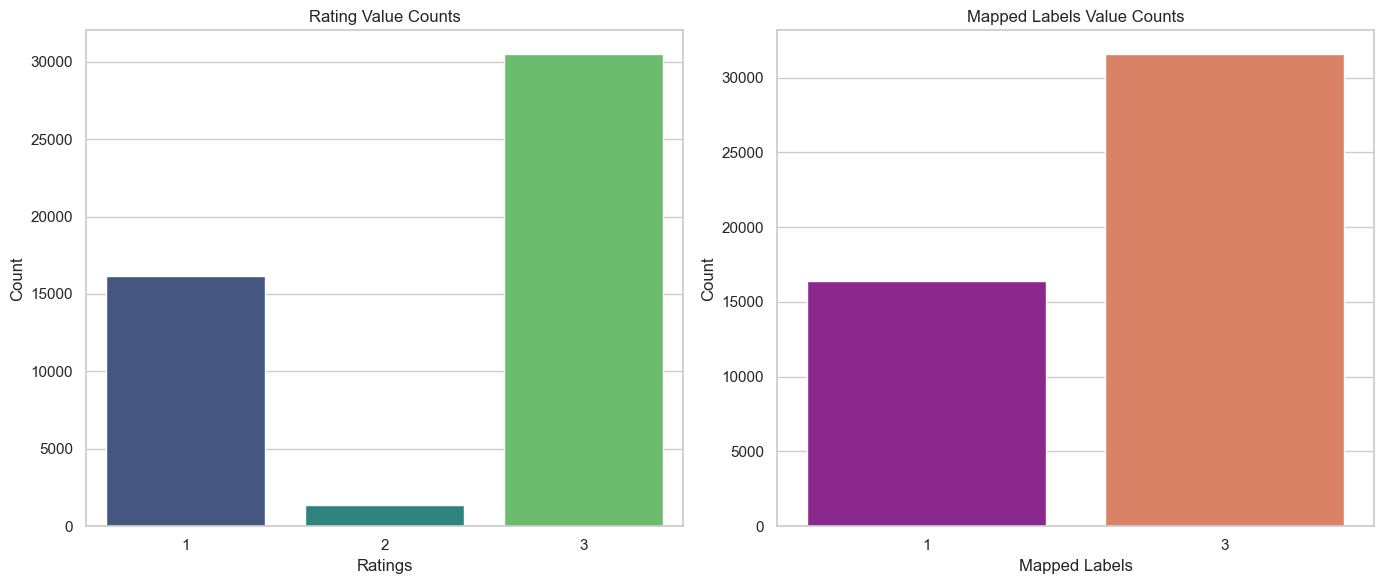

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute value counts for Rating and mapped_labels
rating_counts = data["Rating"].value_counts()
mapped_labels_counts = pd.Series(mapped_labels).value_counts()

# Set the Seaborn style
sns.set(style="whitegrid")

# Plotting Rating Counts vs Mapped Labels Counts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting Rating Counts
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis", ax=axes[0])
axes[0].set_title('Rating Value Counts')
axes[0].set_xlabel('Ratings')
axes[0].set_ylabel('Count')

# Plotting Mapped Labels Counts
sns.barplot(x=mapped_labels_counts.index, y=mapped_labels_counts.values, palette="plasma", ax=axes[1])
axes[1].set_title('Mapped Labels Value Counts')
axes[1].set_xlabel('Mapped Labels')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()
